In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [7]:
train_df.head()


,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098022,2.164062,0.681152,-0.613770,1.308594,-0.455078,-0.235962,0.275879,-2.246094,1.825195,-0.912109,-0.106995,0.304932,0.101990,0.826172,0.416992,0.177002,-0.672852,-0.502930,1.864258,0.409912,-1.926758,0.101990,-0.931152,1.762695,1.449219,-1.096680,-0.686035,-0.250000,-1.859375,1.125000,1.008789,-2.296875,0.385010,-0.875977,1.528320,-0.144043,-1.078125,...,-0.681152,1.250000,-0.564941,-1.318359,-0.922852,0.075012,-0.704102,2.457031,0.770996,-0.459961,0.568848,-1.320312,-1.515625,-2.144531,-1.120117,0.156006,0.819824,-1.048828,-1.125000,0.483887,0.617188,1.252930,1.248047,0.503906,-0.801758,-0.895996,-1.792969,-0.283936,-0.601074,0.568848,0.867188,1.346680,0.503906,-0.648926,0.671875,-2.097656,1.050781,-0.414062,1.038086,-1.065430
1,1,0.0,1.081055,-0.973145,-0.383057,0.325928,-0.427979,0.316895,1.171875,0.352051,0.004002,-0.291016,2.906250,1.084961,2.144531,1.540039,0.583984,1.132812,1.097656,-0.237061,-0.498047,0.282959,-1.099609,-0.416992,1.381836,-0.515137,-1.518555,0.619141,-0.128052,0.866211,-0.540039,1.238281,-0.227051,0.269043,-0.389893,-2.720703,1.659180,0.106018,-0.120972,1.718750,...,0.971191,-1.489258,0.529785,0.916992,-0.093994,-1.407227,0.887207,-0.104004,-0.583008,1.266602,-1.666992,-2.771484,-0.516113,1.311523,0.490967,0.932129,2.064453,0.422119,1.214844,2.011719,0.042999,-0.306885,-0.058990,1.121094,1.333008,0.211060,1.752930,0.053009,1.274414,-0.611816,-0.165039,-1.695312,-1.256836,1.359375,-0.808105,-1.624023,-0.458008,-1.098633,-0.936035,0.973145
2,2,1.0,-0.522949,-0.088989,-0.347900,0.147949,-0.022003,0.404053,-0.022995,-0.171997,0.136963,0.182983,0.458984,0.478027,-0.425049,0.352051,1.094727,0.300049,-1.043945,0.270020,-1.038086,0.144043,-1.658203,-0.945801,0.632812,-0.771973,1.786133,0.135986,-0.103027,-1.222656,2.273438,0.054993,-2.031250,-0.451904,0.064026,0.923828,-0.691895,-0.067017,-0.916992,1.896484,...,-0.540039,-0.299072,1.074219,-0.748047,1.085938,-0.766113,-0.931152,0.431885,1.344727,-0.490967,-1.601562,-0.727051,0.345947,0.779785,-0.526855,-1.122070,-0.208008,-0.729980,-0.302002,2.535156,-1.044922,0.036987,0.020004,1.373047,0.456055,-0.277100,1.380859,1.842773,0.749023,0.202026,0.013000,0.262939,-1.221680,0.726074,1.444336,-1.165039,-1.543945,0.004002,0.799805,-1.210938
3,3,1.0,0.067017,-0.020996,0.392090,-1.636719,-0.446045,-0.725098,-1.035156,0.833984,0.502930,0.273926,0.334961,-1.148438,0.067017,-1.009766,1.047852,-1.442383,0.209961,0.835938,-0.325928,0.715820,-0.764160,0.248047,-1.307617,2.126953,0.364990,0.295898,-0.808105,1.853516,0.117981,0.379883,0.999023,-1.170898,2.798828,0.394043,-1.047852,1.078125,0.400879,-0.486084,...,-0.083008,-0.831055,1.250977,-0.206055,-0.933105,-1.214844,0.281006,0.512207,-0.424072,0.769043,0.223022,-0.709961,2.724609,0.176025,0.845215,-1.225586,1.527344,-1.701172,0.597168,0.150024,1.864258,0.322021,-0.213989,1.282227,0.407959,-0.910156,1.019531,-0.299072,-1.574219,-1.618164,-0.404053,0.640137,-0.595215,-0.965820,0.899902,0.467041,-0.562012,-0.253906,-0.533203,0.238037
4,4,1.0,2.347656,-0.831055,0.511230,-0.020996,1.224609,1.593750,0.584961,1.508789,-0.012001,2.197266,0.189941,0.452881,0.493896,1.477539,-1.412109,0.270020,-1.311523,-0.322021,-0.687988,-0.197998,-0.284912,1.041992,-0.314941,-0.478027,0.024002,-0.189941,1.656250,-0.468994,-1.436523,-0.581055,-0.308105,-0.836914,-1.739258,0.036987,0.335938,-1.101562,2.371094,0.554199,...,-1.049805,-0.346924,0.903809,-1.324219,-0.849121,3.431641,0.222046,0.416016,0.173950,-1.516602,-0.336914,0.054993,-0.464111,0.014000,-1.073242,0.324951,-0.522949,-0.691895,0.189941,-0.882812,-1.830078,1.408203,2.318359,1.704102,-0.723145,1.013672,0.064026,0.096008,-0.774902,1.844727,0.897949,0.134033,2.414062,-0.996094,-1.005859,1.377930,1.24

In [4]:
# drop the columns which are not required for modelling like ID. 
target = train_df["target"]
train_df = train_df.drop(["target","id"],axis=1)
test_id = test_df["id"]
test_df = test_df.drop(["id"],axis=1)



Text(0, 0.5, 'Target')

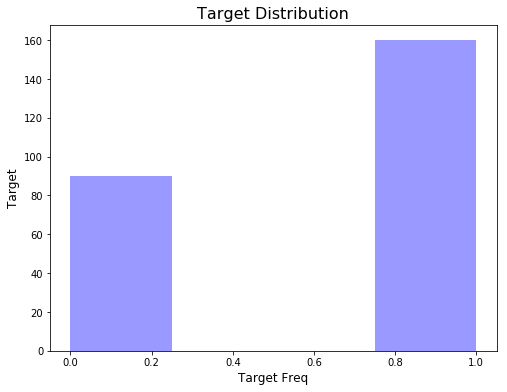

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(target,kde=False,color='b')
plt.title("Target Distribution",fontsize=16)
plt.xlabel("Target Freq",fontsize=12)
plt.ylabel("Target",fontsize=12)



We have 160 1's and 90 0's. Next lets check if any of the features are co-rellated. Corr gives the correlation, we will use heat map for quick visual inspaction. There are no signs of correlation. Creator of competition did quite a work to ensure that there is no correlation among features.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns, index=train_df.index)
X_test = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns, index=test_df.index)

In [52]:
# split the training into 0.75 train and 0.25 test for cross validation
from sklearn.model_selection import StratifiedShuffleSplit
shuffle_split = StratifiedShuffleSplit(test_size=0.2,train_size=0.8,n_splits=50)

In [53]:
param_grid = {'C'     : [1,0.01,0.1,0.9,0.8,2,0.5,0.4,0.7],
              'penalty' : ["l1", "l2"],
              'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3},{1:0.8, 0:0.2}],
             # 'warm_start ' : [True,False],
              'intercept_scaling':[1,0.9,0.8,0.7,0.6,0.5],
               'solver' : ['liblinear', 'saga']
                     
          }
grid_search = GridSearchCV(
    estimator = LogisticRegression(random_state=42,solver="liblinear"),
    param_grid = param_grid, 
     scoring='roc_auc',
    cv = shuffle_split,
    n_jobs=-1
   )

In [54]:
grid_search.fit(train_df,target)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=50, random_state=None, test_size=0.2,
            train_size=0.8),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 0.01, 0.1, 0.9, 0.8, 2, 0.5, 0.4, 0.7], 'penalty': ['l1', 'l2'], 'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}, {1: 0.8, 0: 0.2}], 'intercept_scaling': [1, 0.9, 0.8, 0.7, 0.6, 0.5], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [56]:
print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))


Best parameters : {'C': 0.4, 'class_weight': {1: 0.4, 0: 0.6}, 'intercept_scaling': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross validation score: 0.79
Best estimator: LogisticRegression(C=0.4, class_weight={1: 0.4, 0: 0.6}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)


#### Recursive Feature Elimination

In [98]:
def scores_table(model, subtitle):
    scores = ['roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, train_df,target, cv = 10, scoring = sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df= df.rename(columns={0: 'accuracy', 1:'roc_auc'})

#     trace = go.Table(
#         header=dict(values=['<b>Fold', '<b>Accuracy','<b>Roc auc'],
#                     line = dict(color='#7D7F80'),
#                     fill = dict(color='#a1c3d1'),
#                     align = ['center'],
#                     font = dict(size = 15)),
#         cells=dict(values=[('1','2','3','4','5','mean', 'std'),
#                            np.round(df['accuracy'],3),
#                            np.round(df['roc_auc'],3)],
#                    line = dict(color='#7D7F80'),
#                    fill = dict(color='#EDFAFF'),
#                    align = ['center'], font = dict(size = 15)))

#     layout = dict(width=800, height=400, title = '<b>Cross Validation - 5 folds</b><br>'+subtitle, font = dict(size = 15))
#     fig = dict(data=[trace], layout=layout)

#     py.iplot(fig, filename = 'styled_table')
    return df

In [96]:
log_clf = LogisticRegression(**grid_search.best_params_)
log_clf.fit(train_df,target)

selector = RFE(log_clf, 25, step=1)
selector.fit(train_df,target)
scores_table(selector, 'selector_clf')

,accuracy,roc_auc
0,0.800000,0.902778
1,0.560000,0.569444
2,0.680000,0.687500
3,0.800000,0.965278
4,0.880000,0.840278
5,0.720000,0.770833
6,0.800000,0.868056
7,0.680000,0.805556
8,0.640000,0.680556
9,0.760000,0.847222


#### ElasticNet

In [74]:
param_grid_en = {
                'alpha'     : np.arange(0.1,1.00,0.10),
                'l1_ratio'  :  np.arange(0.1,1.00,0.10),
                'tol'       : [0.0001,0.001]
            }
eNet = ElasticNet(max_iter=10000)
grid_search_en = GridSearchCV(eNet, 
                           param_grid_en, 
                           scoring='roc_auc', 
                           cv = shuffle_split,
                           return_train_score=True,
                           n_jobs = -1)
grid_search_en.fit(train_df,target)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=50, random_state=None, test_size=0.2,
            train_size=0.8),
       error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'tol': [0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [75]:
print("Best parameters : {}".format(grid_search_en.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search_en.best_score_))
print("Best estimator: {}".format(grid_search_en.best_estimator_))

Best parameters : {'alpha': 0.1, 'l1_ratio': 0.5, 'tol': 0.001}
Best cross validation score: 0.78
Best estimator: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.001, warm_start=False)


In [99]:
elastic_clf = ElasticNet(**grid_search_en.best_params_)
elastic_clf.fit(train_df,target)

selector_elastic = RFE(elastic_clf, 25, step=1)
selector_elastic.fit(train_df,target)
scores_table(selector_elastic, 'selector_clf')

,accuracy
0,0.850877
1,0.809524
2,0.666667
3,0.785714
4,0.896104
5,0.756944
6,0.878205
7,0.750000
8,0.791667
9,0.814103


In [62]:
results = pd.DataFrame(grid_search.cv_results_)
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_intercept_scaling,param_penalty,param_solver,params,...,split42_train_score,split43_train_score,split44_train_score,split45_train_score,split46_train_score,split47_train_score,split48_train_score,split49_train_score,mean_train_score,std_train_score
0,0.012912,0.005532,0.004197,0.002637,1,"{1: 0.5, 0: 0.5}",1,l1,liblinear,"{'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'in...",...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [40]:
scores_mean = np.array(results.mean_test_score).reshape(-1)
scores_std = np.array(results.std_test_score).reshape(-1)

print("mean CV scores for each fold {} ".format(scores_mean))
print("std CV scores for each fold {} ".format(scores_std))


mean CV scores for each fold [0.77319444 0.74569444 0.77263889 0.74506944 0.77138889 0.74475694
 0.76944444 0.74440972 0.7678125  0.74399306 0.76565972 0.74263889
 0.77350694 0.74694444 0.77309028 0.74611111 0.771875   0.74565972
 0.76986111 0.74520833 0.76822917 0.74458333 0.76548611 0.74447917
 0.77364583 0.74440972 0.7725     0.744375   0.77069444 0.74371528
 0.7696875  0.74253472 0.76788194 0.74173611 0.76496528 0.7396875
 0.77336806 0.74395833 0.77208333 0.74305556 0.77076389 0.74194444
 0.76927083 0.739375   0.7675     0.73774306 0.76444444 0.73583333
 0.77298611 0.74184028 0.7721875  0.73930556 0.77131944 0.73760417
 0.76930556 0.73576389 0.76746528 0.73395833 0.7640625  0.73201389
 0.5        0.74253472 0.5        0.74256944 0.5        0.74225694
 0.5        0.74163194 0.5        0.74135417 0.5        0.74079861
 0.5        0.74888889 0.5        0.74875    0.5        0.74857639
 0.5        0.74868056 0.5        0.7484375  0.5        0.74819444
 0.5        0.73527778 0.5        

In [76]:
import gc
gc.collect()

2391

In [80]:
#print( "Predictions on test set {}".format(grid_search.predict(test_df)))
pred_lr_all_features= grid_search.predict_proba(test_df)[:,1]
pred_en_all_features=grid_search_en.predict(test_df)

In [100]:
pred_lr = selector.predict_proba(test_df)[:,1]
pred_en=grid_search_en.predict(test_df)

In [101]:
pred_lr_en=np.mean([pred_lr,pred_en], axis=0)


In [102]:
pred_lr_en

array([0.76928252, 0.52082825, 0.68436677, ..., 0.37771706, 0.88207461,
       0.31929382])

In [103]:
#print test file 
sub_df = pd.DataFrame()
sub_df["id"] = test_id 
sub_df["target"] = pred_lr_en
sub_df.to_csv("Log_regression_Elasticnet_Grid_Search_top_25_Features.csv", index=False)

In [104]:
sub_df.head()

,id,target
0,250,0.769283
1,251,0.520828
2,252,0.684367
3,253,0.848034
4,254,0.639345
